# Air Pollution Data Analysis Portfolio Project

## 1. Project Overview
This project investigates air pollution data to analyze **trends, pollutant distribution, and potential environmental and health impacts**. The goal is to identify key factors affecting air quality and understand correlations with external influences such as climate and urbanization.

## 2. Introduction
Air pollution is a pressing environmental concern that affects public health and ecosystems. Analyzing air pollution data helps in understanding pollutant trends, identifying high-risk areas, and formulating policies for better air quality management. This analysis provides insights into pollution levels over time and their contributing factors.

## 3. Data Cleaning
### 3.1 Dataset Overview
- **Source:** Air pollution dataset with recorded pollutant levels.
- **Key Columns:**
  - `Location` (City/Region where data was collected)
  - `Date` (Timestamp of pollution measurement)
  - `PM2.5`, `PM10`, `NO2`, `SO2`, `CO`, `O3` (Air pollutant concentration levels)
  - `Temperature`, `Humidity`, `Wind Speed` (Meteorological conditions)

### 3.2 Data Cleaning Process
- Removed duplicate records to maintain data integrity.
- Handled missing values in pollutant and meteorological columns.
- Standardized date formats for time-series analysis.
- Converted numerical fields to appropriate data types.

## 4. Exploratory Data Analysis (EDA)
### 4.1 Trends in Pollutant Concentrations
- Analyzed long-term trends of pollutants to observe seasonal and yearly variations.
- Identified spikes in pollutant levels due to environmental factors or human activities.

### 4.2 Geographic Analysis
- Examined pollution levels across different locations to determine high-risk areas.
- Used visualization techniques to highlight regions with severe air quality issues.

### 4.3 Correlation Between Pollutants and Meteorological Factors
- Investigated the relationship between weather conditions (temperature, humidity, wind speed) and pollutant concentrations.
- Found significant links between specific weather patterns and pollution spikes.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df=pd.read_csv('updated_pollution_dataset.csv')

In [48]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [31]:
df.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

In [32]:
df.shape

(5000, 10)

In [34]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [45]:
df.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

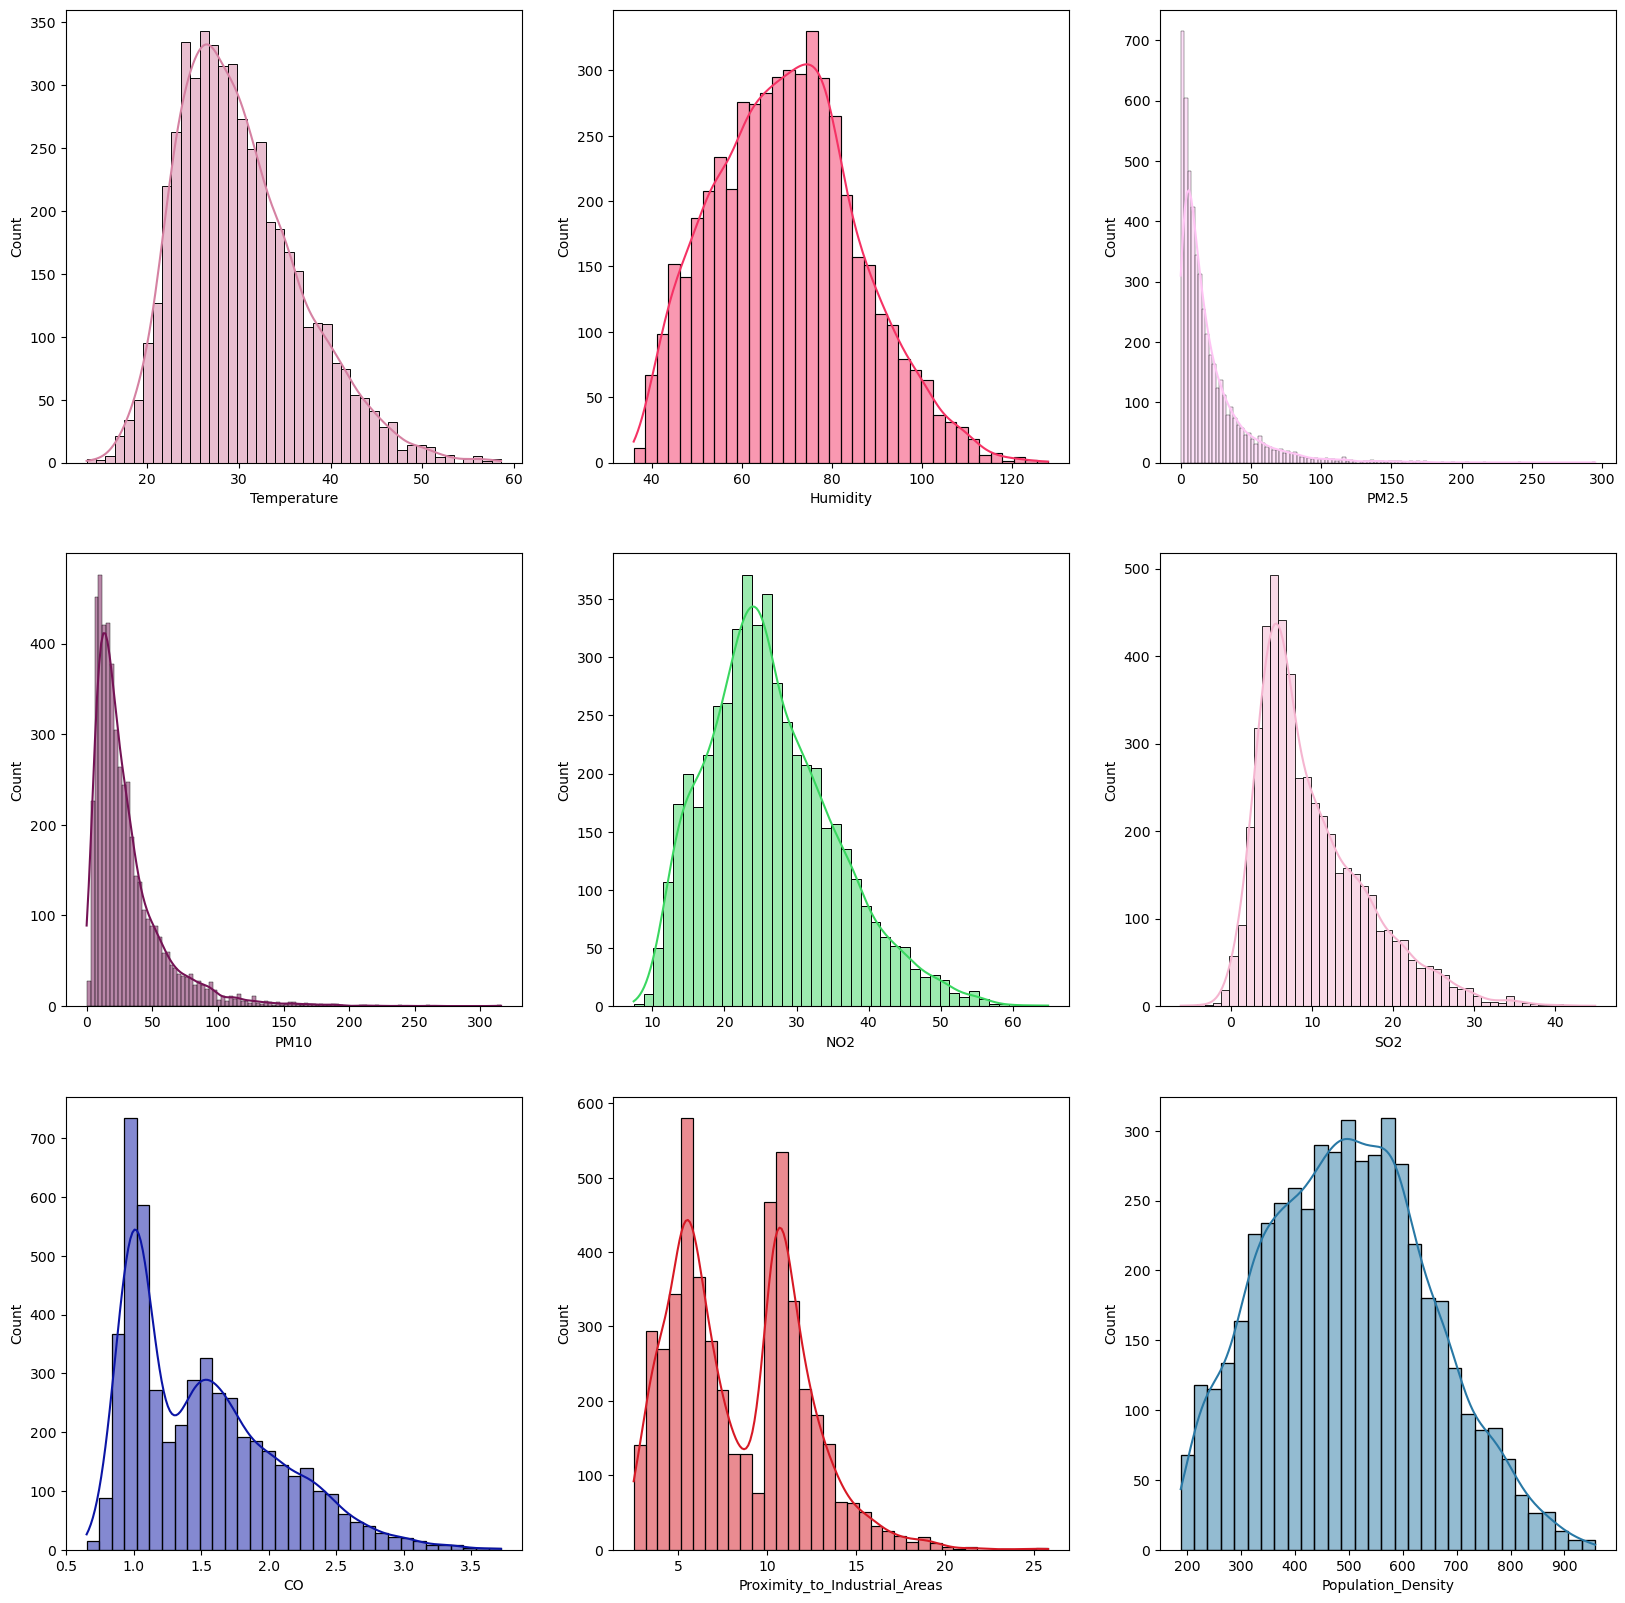

In [120]:
fig,ax=plt.subplots(3,3,figsize=(20,20))
ax=ax.flatten()
i=0
for col in df.columns:
    r=random.random()
    g=random.random()
    b=random.random()
    if (col!= 'Air Quality'):
        sns.histplot(df,x=col,ax=ax[i],kde=True,color=(r,g,b))
        i+=1


In [136]:
df.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

In [139]:
tdf=df['Air Quality'].value_counts().reset_index()
tdf

,index,Air Quality
0,Good,2000
1,Moderate,1500
2,Poor,1000
3,Hazardous,500


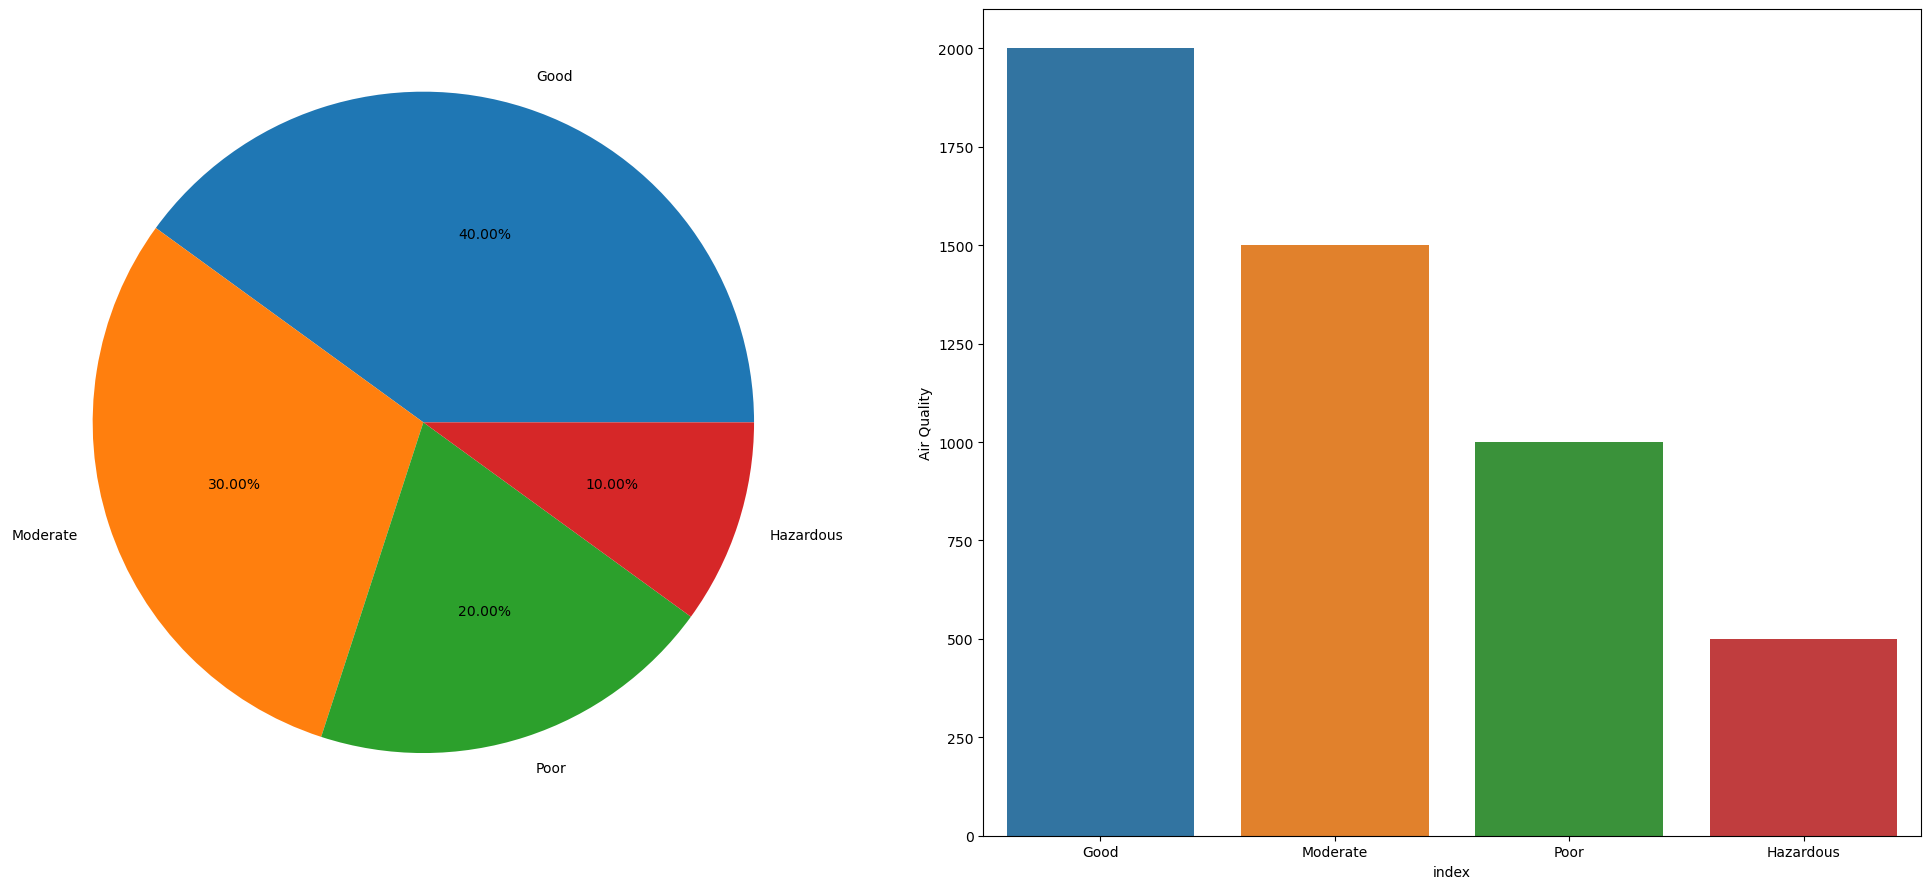

In [158]:
fig,ax=plt.subplots(1,2,figsize=(20,9))
tdf=df['Air Quality'].value_counts().reset_index()
ax[0].pie(tdf['Air Quality'],labels=tdf['index'],autopct='%.2f%%')
ax[0].set_aspect('equal')
sns.barplot(data=tdf,x='index',y='Air Quality')
plt.tight_layout()
plt.show()

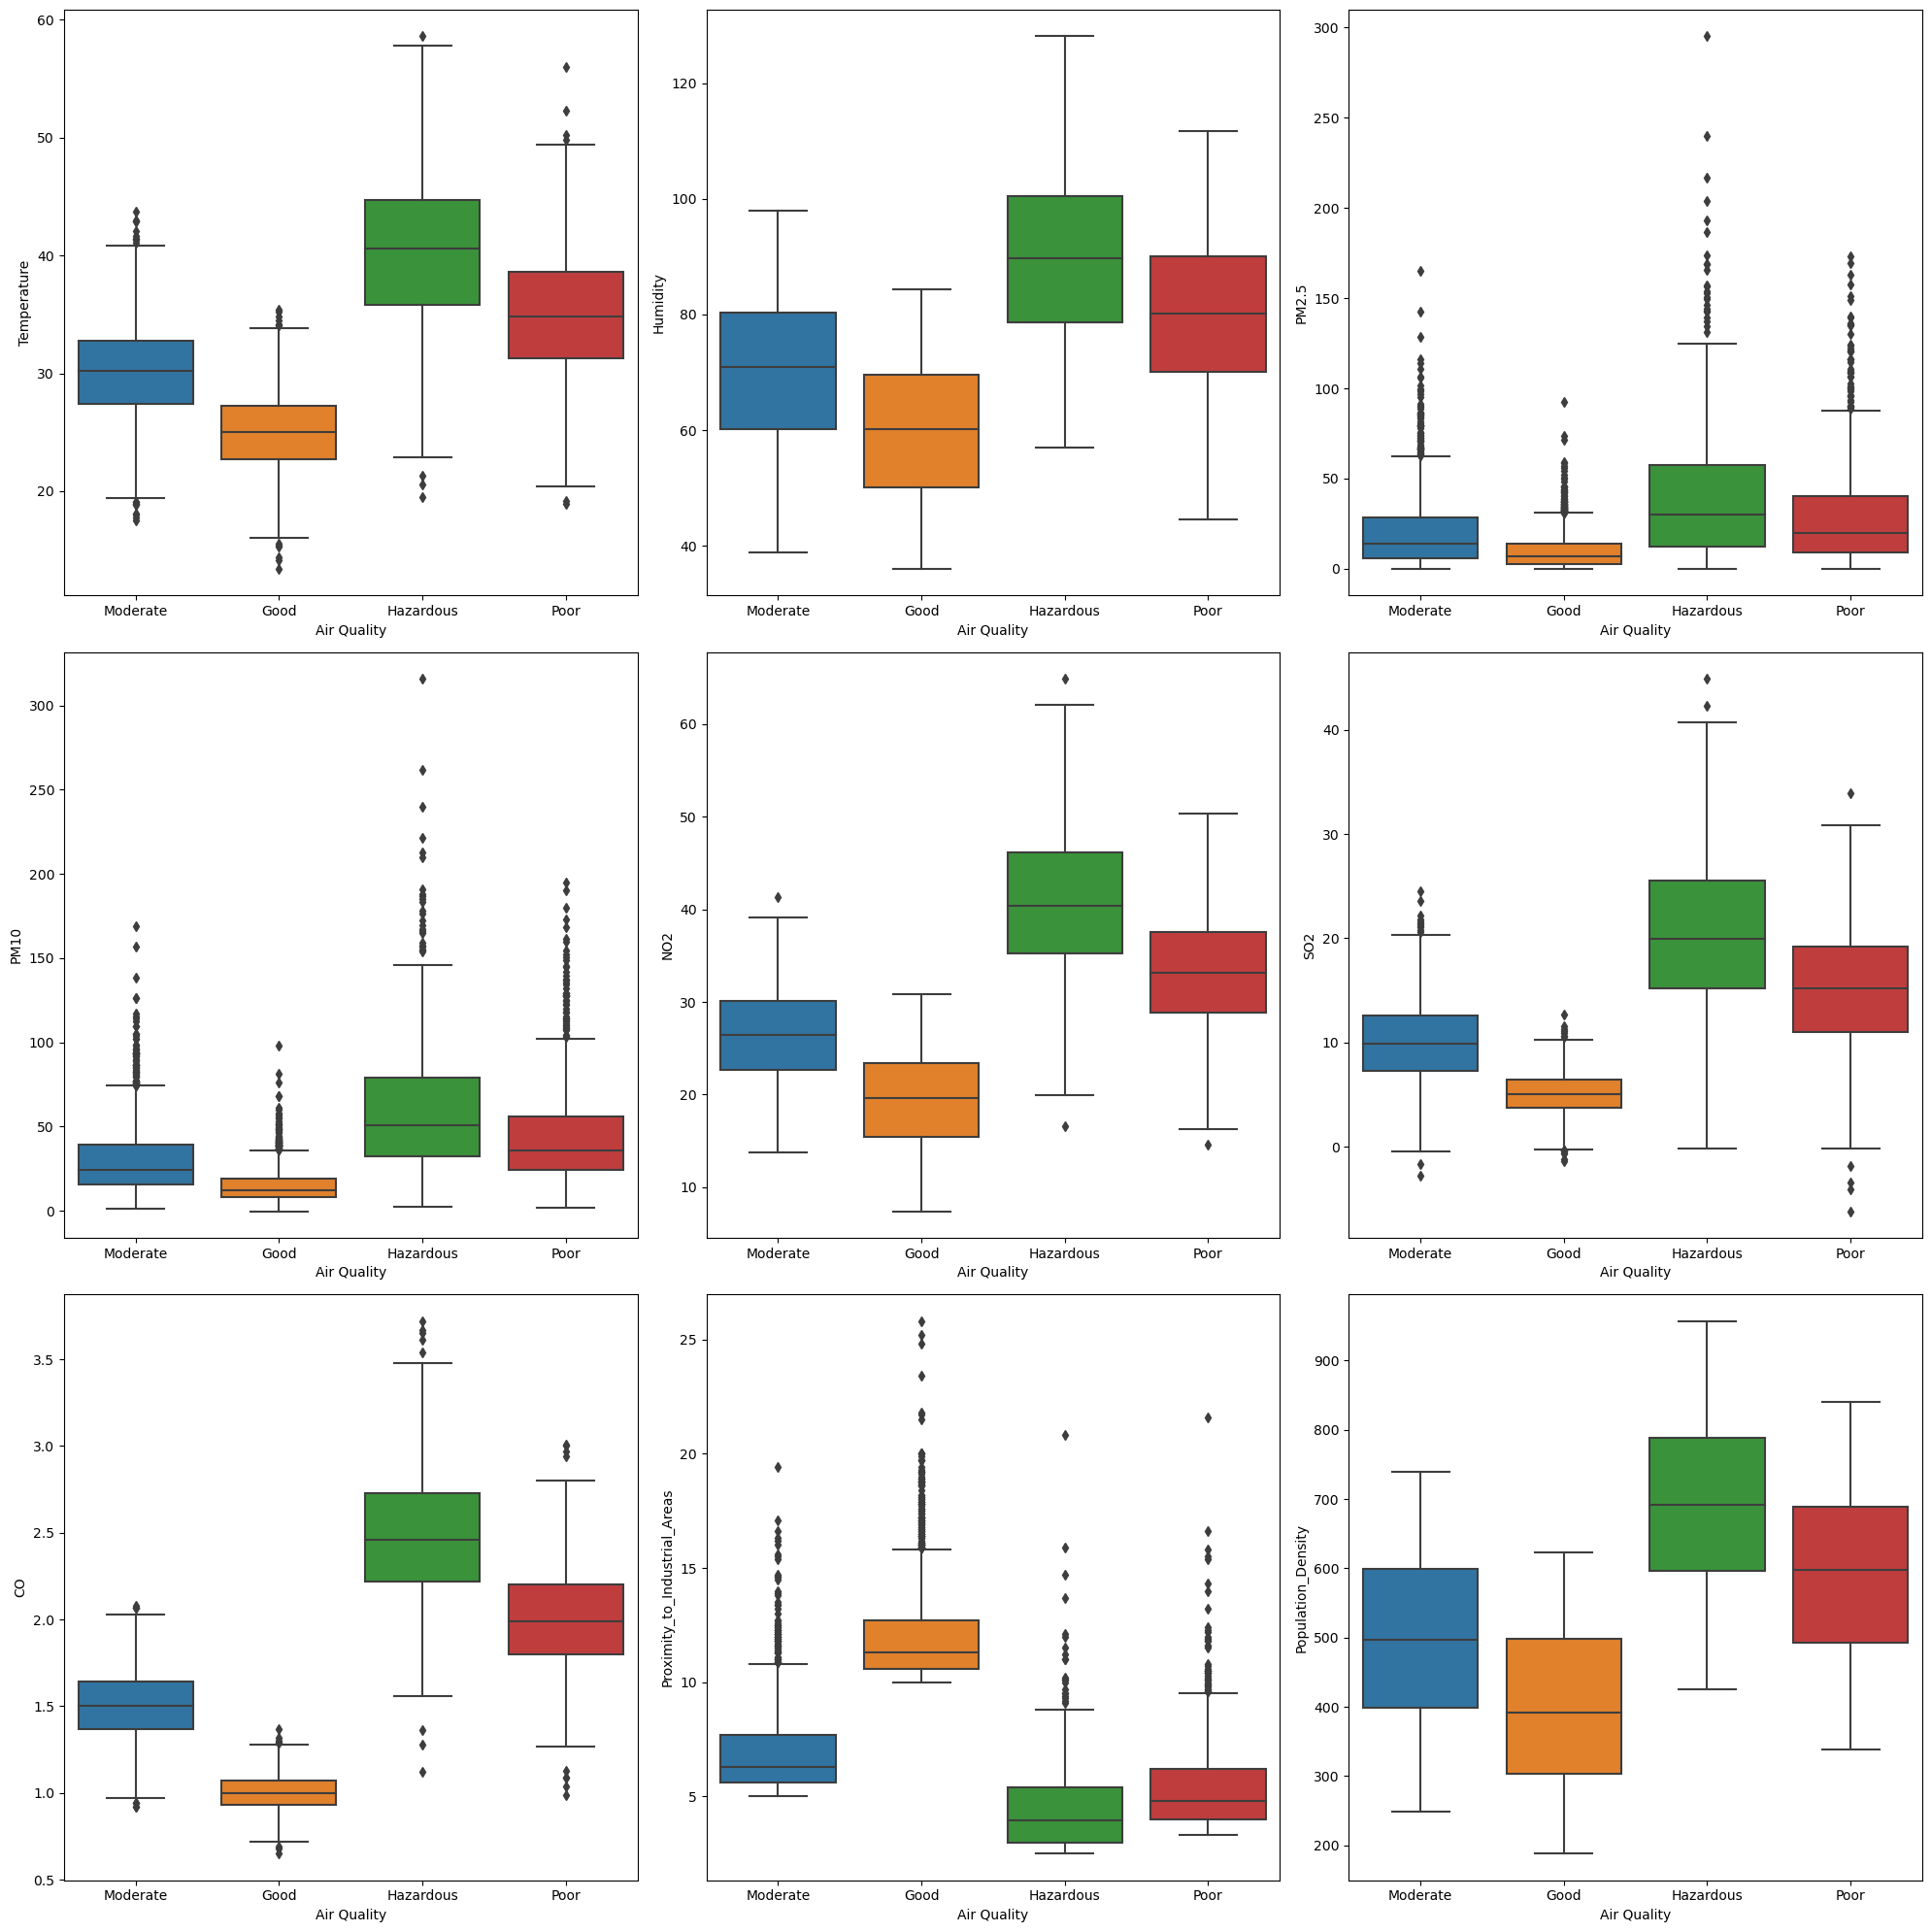

In [187]:
fig,ax=plt.subplots(3,3,figsize=(20,20))
ax=ax.flatten()
cols=['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
      'Proximity_to_Industrial_Areas','Population_Density']
a=0
for i in cols:
    sns.boxplot(data=df,x='Air Quality',y=i,ax=ax[a])
    a+=1
plt.tight_layout()
plt.show()

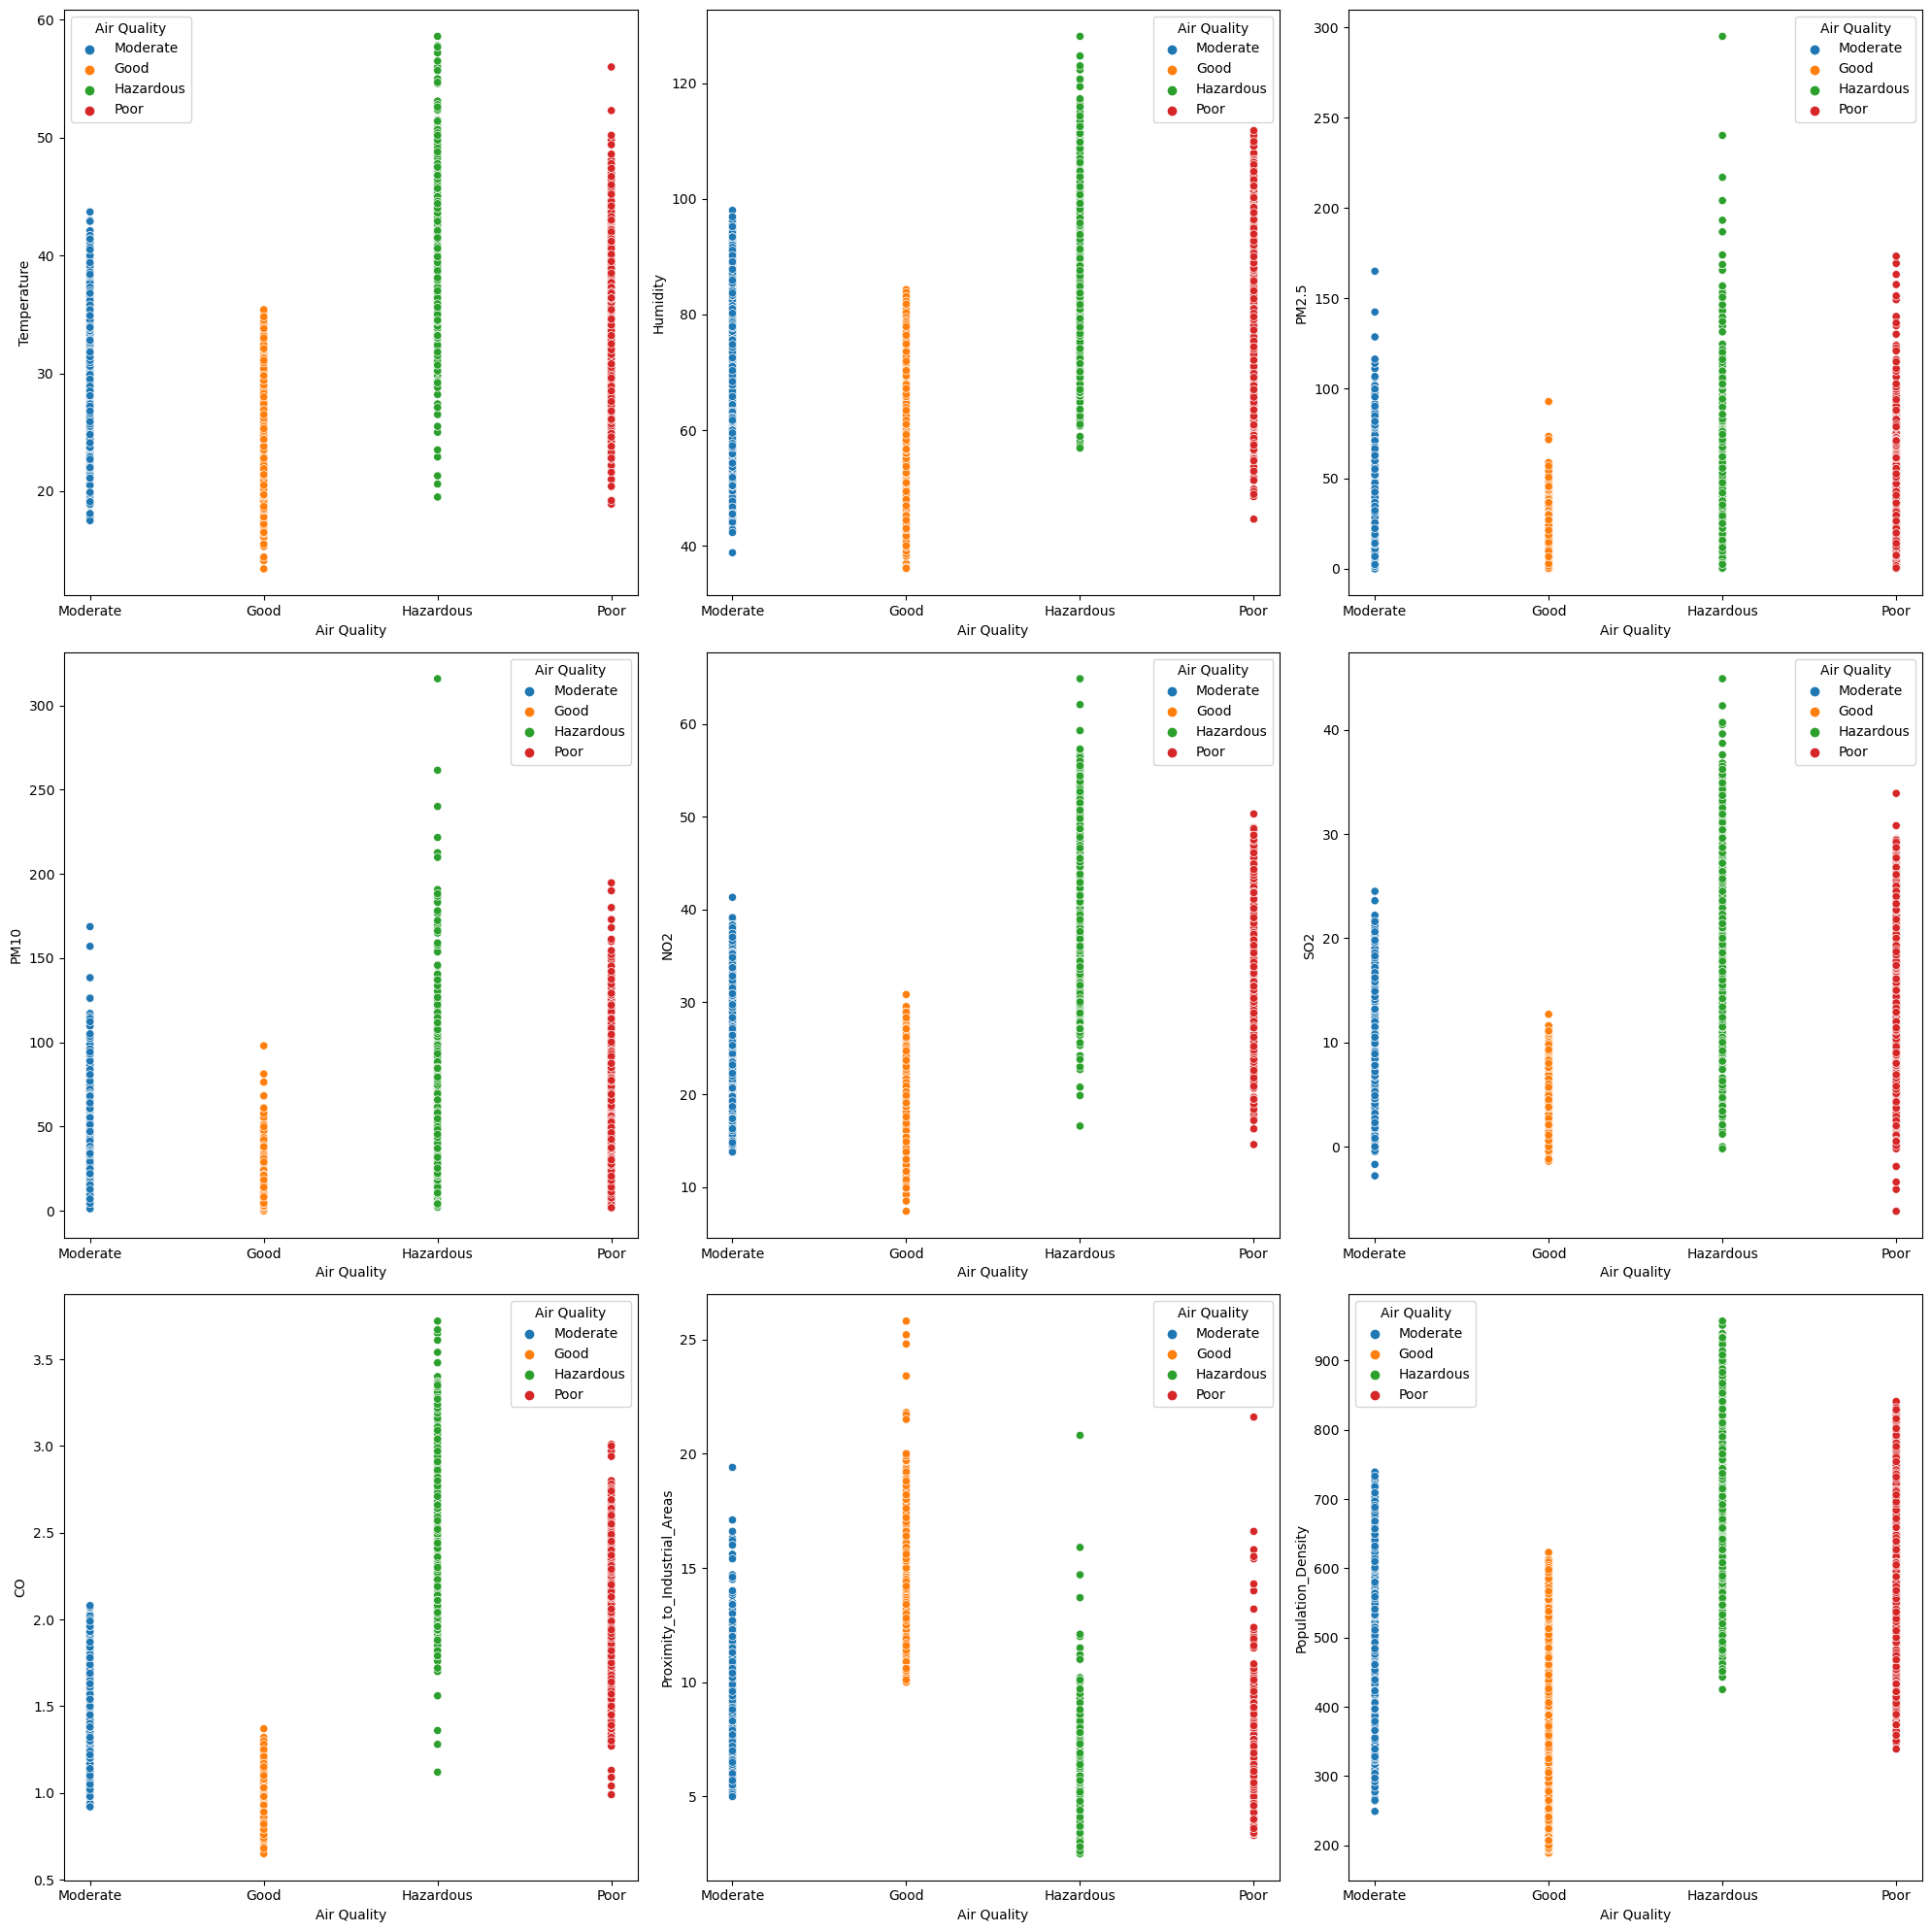

In [192]:
fig,ax=plt.subplots(3,3,figsize=(20,20))
ax=ax.flatten()
cols=['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
      'Proximity_to_Industrial_Areas','Population_Density']
a=0
for i in cols:
    sns.scatterplot(data=df,x='Air Quality',y=i,ax=ax[a],hue='Air Quality')
    a+=1
plt.tight_layout()
plt.show()

<Axes: xlabel='Proximity_to_Industrial_Areas', ylabel='Population_Density'>

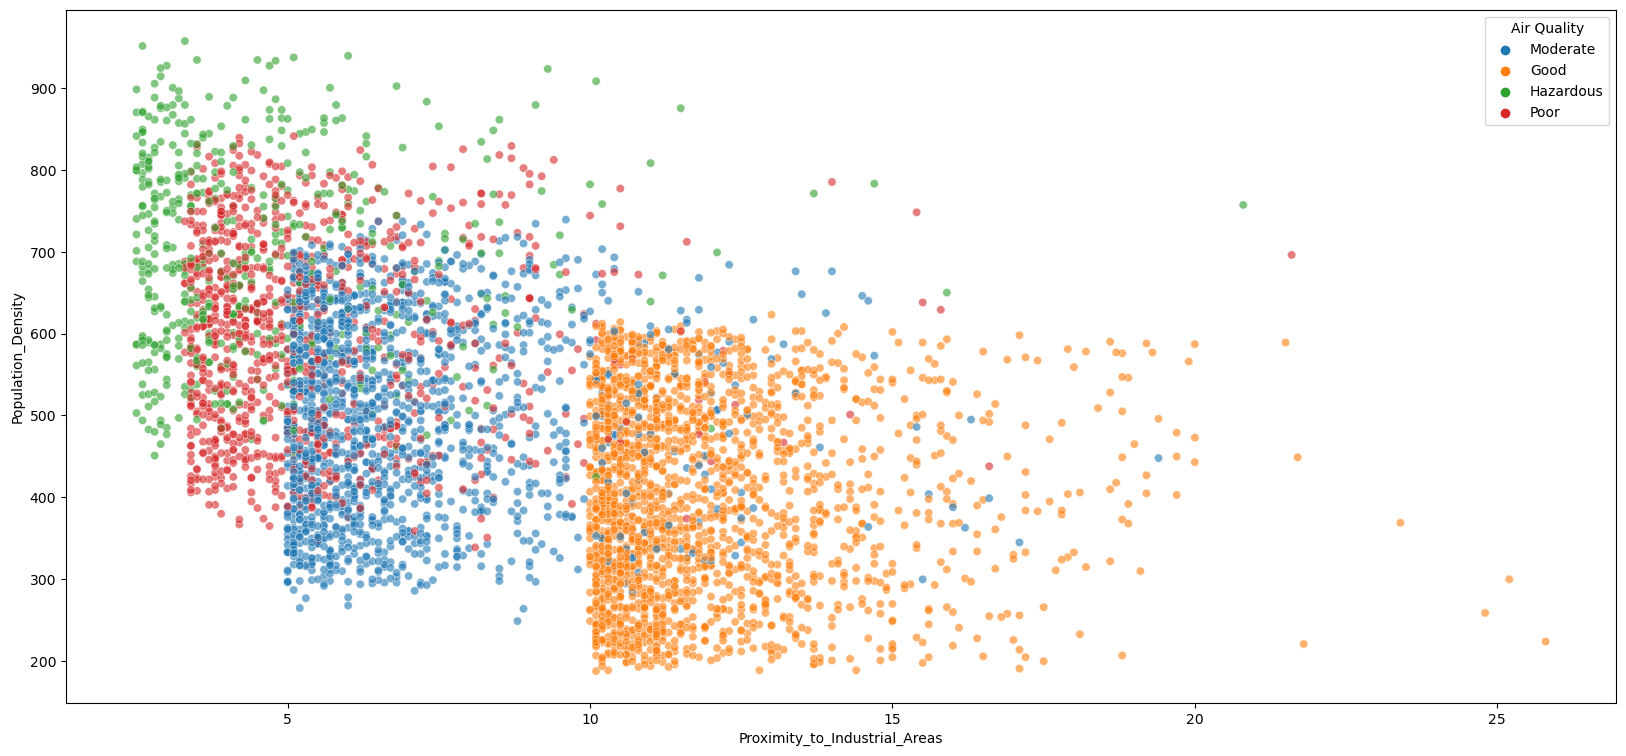

In [199]:
plt.figure(figsize=(20,9))
sns.scatterplot(data=df,x='Proximity_to_Industrial_Areas',y='Population_Density',hue='Air Quality',alpha=0.6)

<Axes: xlabel='Proximity_to_Industrial_Areas', ylabel='CO'>

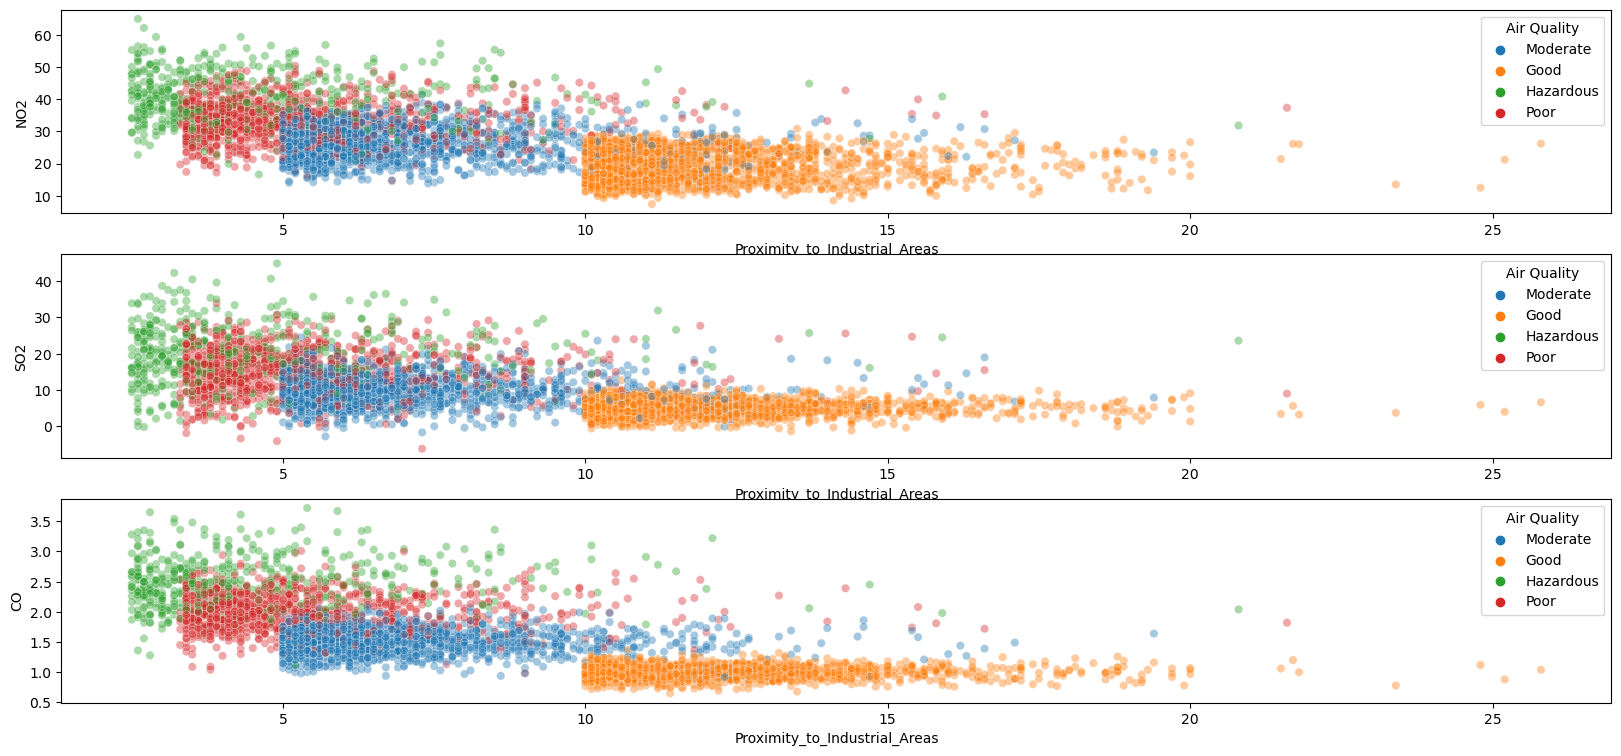

In [202]:
fig,ax=plt.subplots(3,1,figsize=(20,9))
sns.scatterplot(data=df,x='Proximity_to_Industrial_Areas',y='NO2',ax=ax[0],hue='Air Quality',alpha=0.4)
sns.scatterplot(data=df,x='Proximity_to_Industrial_Areas',y='SO2',ax=ax[1],hue='Air Quality',alpha=0.4)
sns.scatterplot(data=df,x='Proximity_to_Industrial_Areas',y='CO',ax=ax[2],hue='Air Quality',alpha=0.4)

In [201]:
df.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

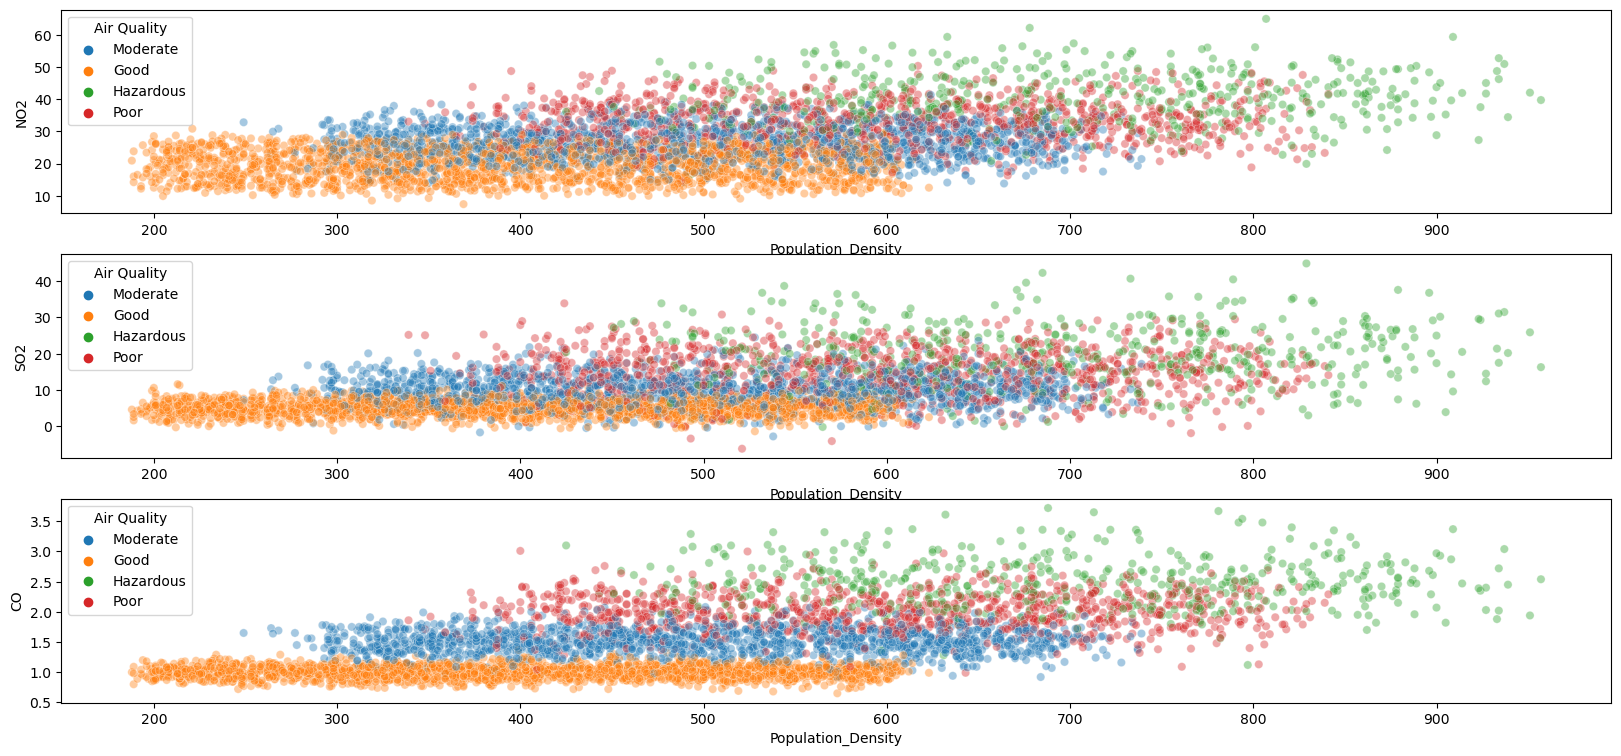

In [204]:
fig,ax=plt.subplots(3,1,figsize=(20,9))
sns.scatterplot(data=df,x='Population_Density',y='NO2',hue='Air Quality',ax=ax[0],alpha=0.4)
sns.scatterplot(data=df,x='Population_Density',y='SO2',hue='Air Quality',ax=ax[1],alpha=0.4)
sns.scatterplot(data=df,x='Population_Density',y='CO',hue='Air Quality',ax=ax[2],alpha=0.4)
plt.show()

# 5. Key Findings
### 5.1 Insights Gathered
- **Pollution levels vary significantly across seasons**, with higher levels in winter due to atmospheric conditions.
- **Urban areas show higher pollution concentrations** compared to rural areas due to traffic and industrial activities.
- **Meteorological factors influence pollution levels**, with wind speed reducing pollutant concentration and humidity affecting particulate matter.
- **Certain pollutants are more correlated with specific sources**, e.g., CO levels rising due to vehicular emissions.

### 5.2 Future Recommendations
- Implement stricter air quality regulations in high-risk regions.
- Conduct further studies on pollution-health impacts to guide policy measures.
- Utilize predictive modeling to forecast pollution levels and mitigate risks.

## 6. Conclusion
This analysis provides **valuable insights into air pollution trends, environmental influences, and potential mitigation strategies**. By understanding pollutant distribution and contributing factors, policymakers and researchers can develop more effective air quality management strategies. Future research can integrate socio-economic factors and machine learning techniques for advanced predictive analysis.

